In [1]:
#pip install eunjeon

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

fe = fm.FontEntry(
    fname=r'C:\workspaces\EDA\NanumGothic.ttf',
    name='NanumGothic')
fm.fontManager.ttflist.insert(0, fe)
plt.rcParams.update({'font.size': 9, 'font.family': 'NanumGothic'})

In [3]:
# JSON 파일 경로 설정
json_file_path = "도서자료요약.json"

# JSON 파일을 Pandas DataFrame으로 읽어오기
df = pd.read_json(json_file_path)
df = df.drop(columns=['index'])
df.head()

,original_text,summary_text
0,지금의 국가가 직면하는 위기는 전통사회의 그것과 위기의 규모뿐만아니라 종류와 성질 ...,현대 사회에서 발생하는 다양하고 복잡한 위기는 과거와 다르게 국가의 재난으로 이어질...
1,자연재해나 불량 수산식품 파동 등의 인위적 재난이 수산분야 피해로이어질 경우 일반분...,"수산분야의 인위적 재난 시수산물 수급 문제로 생산자들의 매출이 크게 줄고, 시장 전..."
2,하지만 이와 반대로 MG 파동 이후 기간(2005.10～2011.12)의 경우에는 ...,MG 파동 이후에는 양식 송어의 생산량의 증가가 통계적 유의성을 갖는 것으로 드러났...
3,그러나 사회적 이슈가 발생하였을 경우에 전문적으로 이러한 정보를 수집하고 분석하는 ...,사회적 이슈 발생 시 전문적으로 정보 수집 및 분석을 하는 관측 시스템이 아직 구축...
4,네 번째는 공급감소로 국내 물량이 부족하게 되면 유통질서가 왜곡될 가능성이 많기 때...,일부 경우에서의 유통질서 혼란을 방지하기 위해 거래형태의 변형이 필요하다. 의도적 ...


In [4]:
# DataFrame의 기본 정보 출력
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180001 entries, 0 to 180000
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   original_text  180001 non-null  object
 1   summary_text   180001 non-null  object
dtypes: object(2)
memory usage: 2.7+ MB


In [5]:
# 요약 통계 정보 출력
df.describe()

,original_text,summary_text
count,180001,180001
unique,179997,178290
top,이에 따라 국제기구를 중심으로 ICT를 활용한 기후변화 대응 방안을 적극적이고 구체...,배타성이 계약상에 암묵적으로 이미 존재하는 경우 그 사실을 명확히 기재하는 것이 필...
freq,2,327


In [6]:
# DataFrame에서 null값 확인
null_info = df.isnull().sum()

# null값이 있는 열과 그 개수 출력
print("Null Value Information:")
print(null_info)

# null값이 있는 행 수 출력
null_rows = df[df.isnull().any(axis=1)]
print("\nRows with Null Values:")
print(null_rows)

Null Value Information:
original_text    0
summary_text     0
dtype: int64

Rows with Null Values:
Empty DataFrame
Columns: [original_text, summary_text]
Index: []


## 원문과 요약문의 단어 수 비교

In [7]:
import numpy as np

# 원문과 요약문의 단어 수 계산
df['Original Word Count'] = df['original_text'].apply(lambda x: len(x.split()))
df['Summary Word Count'] = df['summary_text'].apply(lambda x: len(x.split()))

# 최대, 최소, 평균 계산
original_word_count_max = df['Original Word Count'].max()
original_word_count_min = df['Original Word Count'].min()
original_word_count_mean = df['Original Word Count'].mean()

summary_word_count_max = df['Summary Word Count'].max()
summary_word_count_min = df['Summary Word Count'].min()
summary_word_count_mean = df['Summary Word Count'].mean()

# 결과 출력
print(f"  Original Text 단어 수 최대: {original_word_count_max}")
print(f"  Original Text 단어 수 최소: {original_word_count_min}")
print(f"  Original Text 단어 수 평균: {original_word_count_mean:.2f}")
print(f"  Summary Text 단어 수 최대: {summary_word_count_max}")
print(f"  Summary Text 단어 수 최소: {summary_word_count_min}")
print(f"  Summary Text 단어 수 평균: {summary_word_count_mean:.2f}")

  Original Text 단어 수 최대: 259
  Original Text 단어 수 최소: 11
  Original Text 단어 수 평균: 101.12
  Summary Text 단어 수 최대: 96
  Summary Text 단어 수 최소: 1
  Summary Text 단어 수 평균: 26.93


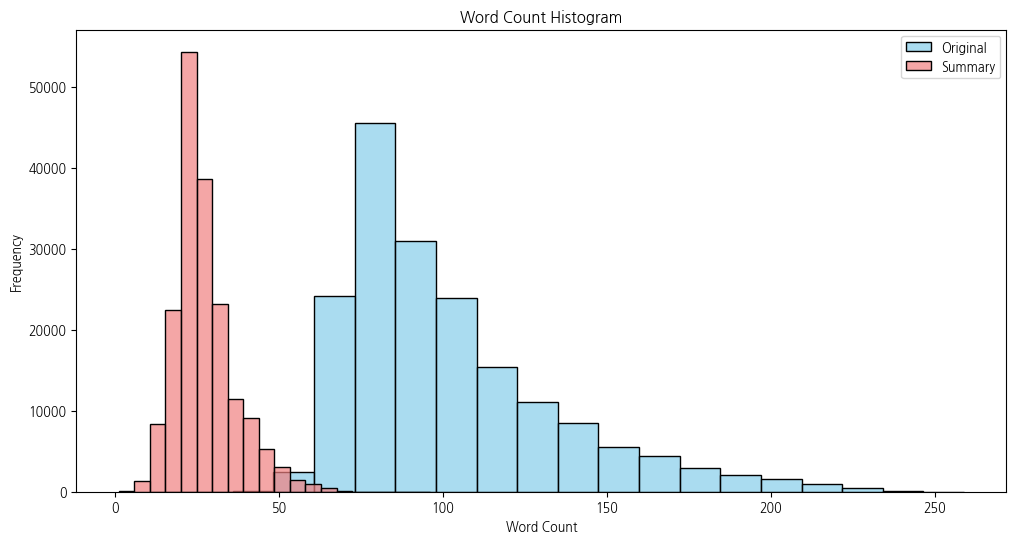

In [8]:
# 원문과 요약문 단어 수 히스토그램
plt.figure(figsize=(12, 6))
sns.histplot(df['Original Word Count'], bins=20, color='skyblue', label='Original', edgecolor='black', alpha=0.7)
sns.histplot(df['Summary Word Count'], bins=20, color='lightcoral', label='Summary', edgecolor='black', alpha=0.7)
plt.title('Word Count Histogram')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.legend()
plt.show()

c:\Users\heeji\anaconda3\envs\dsde04\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


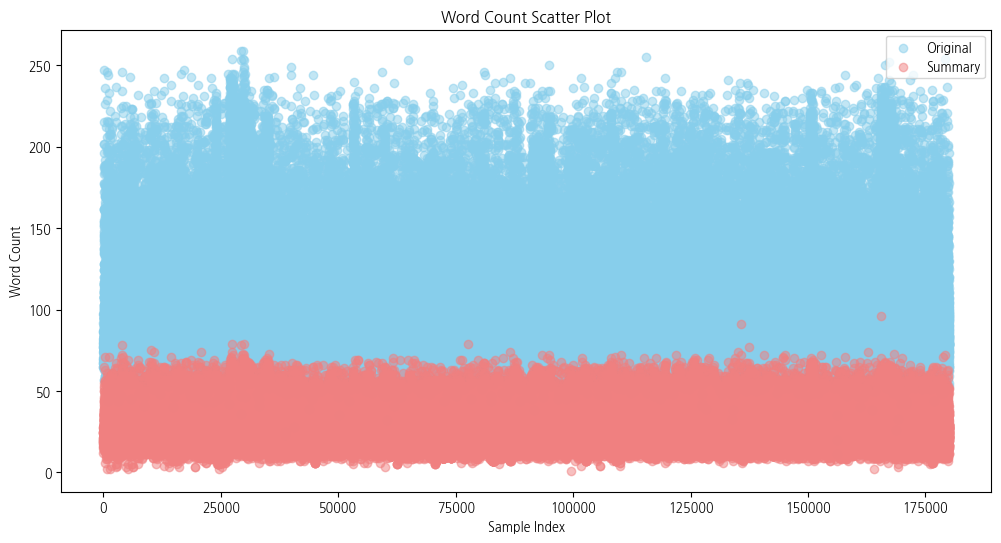

In [9]:
# 원문과 요약문 단어 수 산점도
plt.figure(figsize=(12, 6))
plt.scatter(range(len(df)), df['Original Word Count'], color='skyblue', alpha=0.5, label='Original')
plt.scatter(range(len(df)), df['Summary Word Count'], color='lightcoral', alpha=0.5, label='Summary')
plt.title('Word Count Scatter Plot')
plt.xlabel('Sample Index')
plt.ylabel('Word Count')
plt.legend()
plt.show()

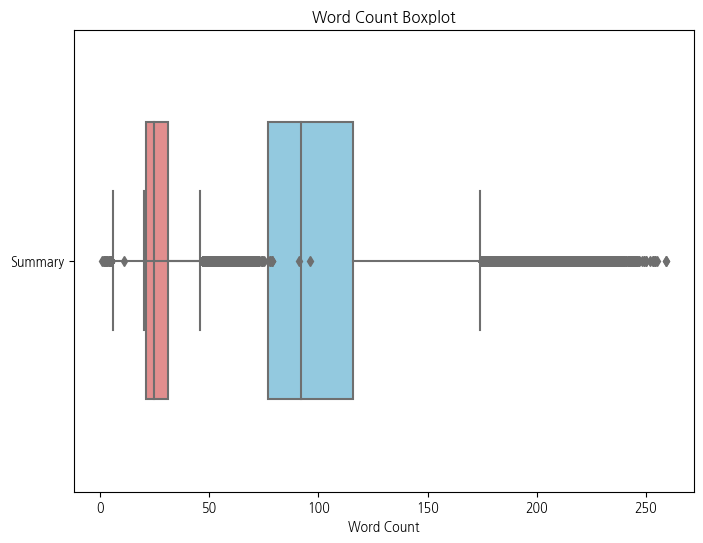

In [10]:
# 원문과 요약문 단어 수 박스플롯
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Original Word Count'], y=['Original']*len(df), color='skyblue', width=0.6)
sns.boxplot(x=df['Summary Word Count'], y=['Summary']*len(df), color='lightcoral', width=0.6)
plt.title('Word Count Boxplot')
plt.xlabel('Word Count')
plt.show()

## 원문과 요약문의 글자 수 비교

In [11]:
import numpy as np

# 원문과 요약문의 단어 길이 계산
df['Original Word Length'] = df['original_text'].apply(len)
df['Summary Word Length'] = df['summary_text'].apply(len)

# 최대, 최소, 평균 계산
original_word_length_max = df['Original Word Length'].max()
original_word_length_min = df['Original Word Length'].min()
original_word_length_mean = df['Original Word Length'].mean()

summary_word_length_max = df['Summary Word Length'].max()
summary_word_length_min = df['Summary Word Length'].min()
summary_word_length_mean = df['Summary Word Length'].mean()

# 결과 출력
print(f"  Original Text 단어 글자 수 최대: {original_word_length_max}")
print(f"  Original Text 단어 글자 수 최소: {original_word_length_min}")
print(f"  Original Text 단어 글자 수 평균: {original_word_length_mean:.2f}")
print(f"  Summary Text 단어 글자 수 최대: {summary_word_length_max}")
print(f"  Summary Text 단어 글자 수 최소: {summary_word_length_min}")
print(f"  Summary Text 단어 글자 수 평균: {summary_word_length_mean:.2f}")


  Original Text 단어 글자 수 최대: 1043
  Original Text 단어 글자 수 최소: 243
  Original Text 단어 글자 수 평균: 455.71
  Summary Text 단어 글자 수 최대: 423
  Summary Text 단어 글자 수 최소: 9
  Summary Text 단어 글자 수 평균: 118.35


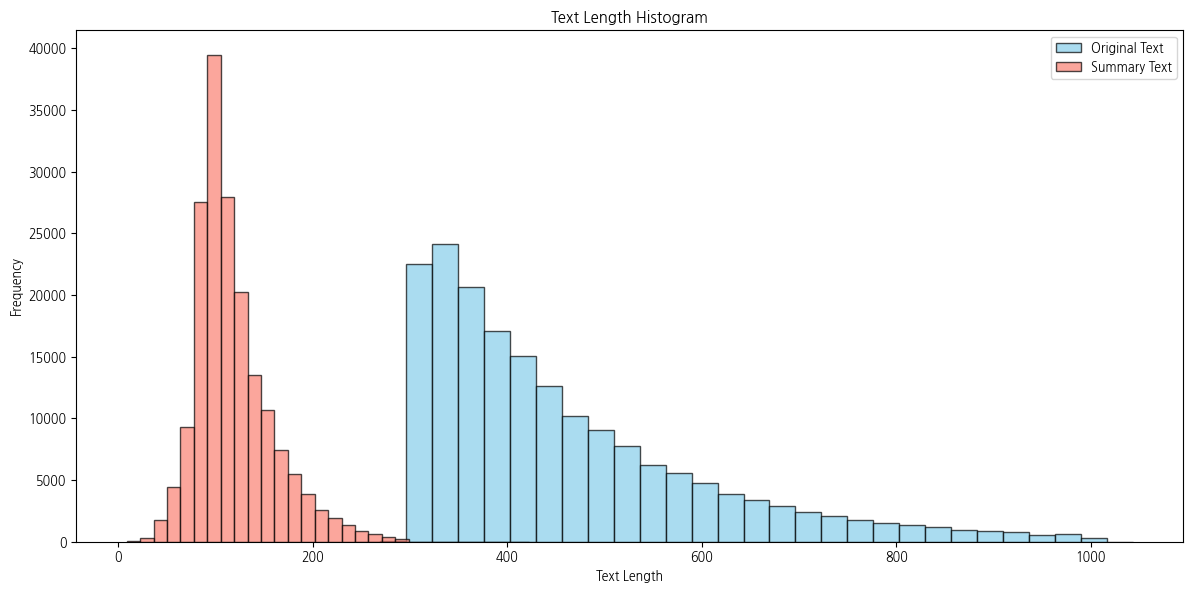

In [12]:
# original_text와 summary_text의 글자 수 분포 확인
df['original_text_length'] = df['original_text'].apply(len)
df['summary_text_length'] = df['summary_text'].apply(len)

# 그래프 그리기
plt.figure(figsize=(12, 6))

# original_text의 글자 수 분포 히스토그램
plt.hist(df['original_text_length'], bins=30, color='skyblue', edgecolor='black', alpha=0.7, label='Original Text')
plt.title('Text Length Histogram')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

# summary_text의 글자 수 분포 히스토그램
plt.hist(df['summary_text_length'], bins=30, color='salmon', edgecolor='black', alpha=0.7, label='Summary Text')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

# 범례 추가
plt.legend()

plt.tight_layout()
plt.show()

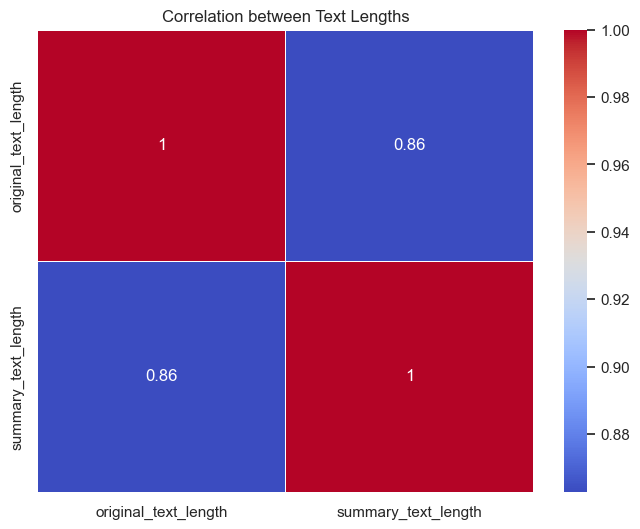

In [13]:
# 요약 텍스트와 원본 텍스트의 글자 수 간의 상관 관계 히트맵
# 0.86의 상관 계수는 두 변수 간 강한 양의 상관 관계가 있다는 것을 의미
# 시각화 스타일 설정
sns.set(style="whitegrid")

# 그래프 크기 설정
plt.figure(figsize=(8, 6))

# 상관 관계 계산
correlation = df[['original_text_length', 'summary_text_length']].corr()

# 히트맵 그리기
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=.5)

# 그래프 제목 설정
plt.title('Correlation between Text Lengths')

# 그래프 표시
plt.show()

C:\Users\heeji\AppData\Local\Temp\ipykernel_27224\2255183600.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='original_text_length', y='summary_text_length', data=df, palette="viridis")


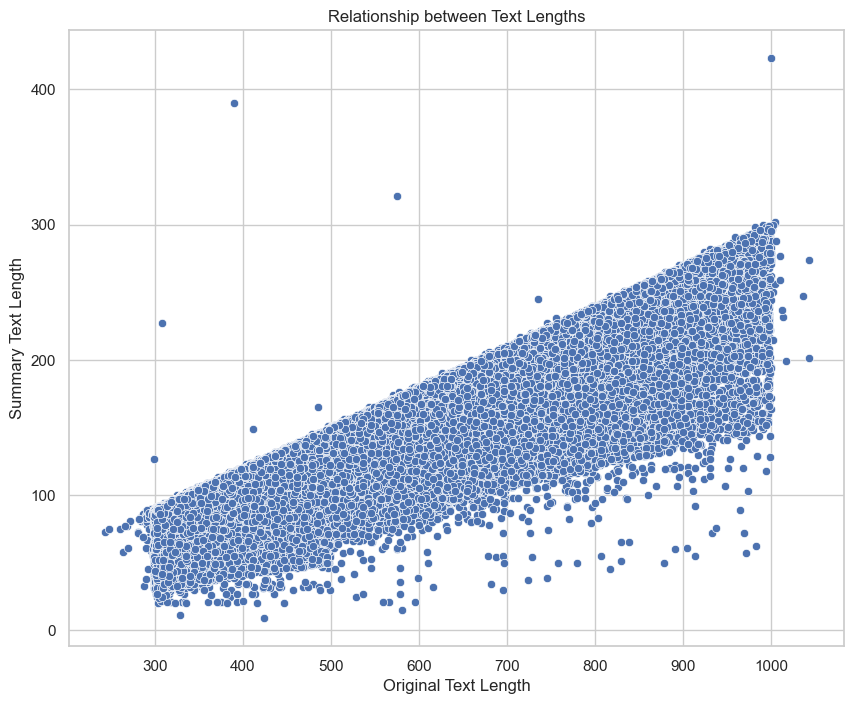

In [14]:
# 요약 텍스트와 원본 텍스트의 글자 수 간의 관계
# 시각화 스타일 설정
sns.set(style="whitegrid")

# 그래프 크기 설정
plt.figure(figsize=(10, 8))

# 그래프 그리기
sns.scatterplot(x='original_text_length', y='summary_text_length', data=df, palette="viridis")

# 그래프 제목 및 레이블 설정
plt.title('Relationship between Text Lengths')
plt.xlabel('Original Text Length')
plt.ylabel('Summary Text Length')

# 그래프 표시
plt.show()


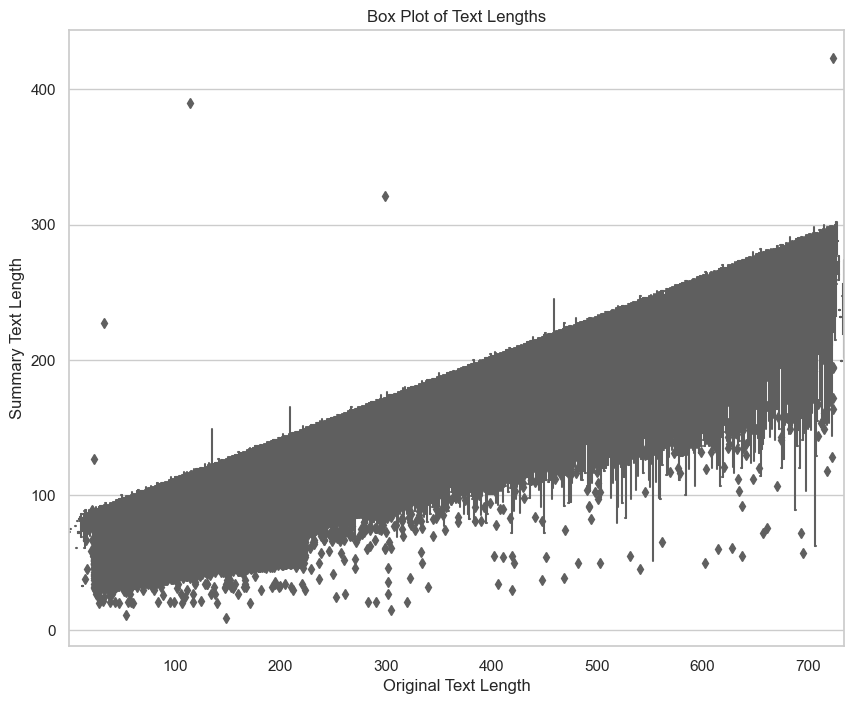

In [15]:
# summary_text의 글자 수와 original_text의 글자 수 상자 그림 (Box Plot)
# 이상치가 많지는 않음

# 시각화 스타일 설정
sns.set(style="whitegrid")

# 그래프 크기 설정
plt.figure(figsize=(10, 8))

# 상자 그림 그리기
sns.boxplot(x='original_text_length', y='summary_text_length', data=df, palette="Set3")

# X 축 눈금 위치 및 라벨 설정
x_ticks = [100, 200, 300, 400, 500, 600, 700]  # 원하는 눈금 위치
x_labels = ['100', '200', '300', '400', '500', '600', '700']  # 각 눈금의 라벨

plt.xticks(x_ticks, x_labels)  # X 축 눈금 설정

# 그래프 제목 및 레이블 설정
plt.title('Box Plot of Text Lengths')
plt.xlabel('Original Text Length')
plt.ylabel('Summary Text Length')

# 그래프 표시
plt.show()


In [16]:
column_names = df.columns
print(column_names)

Index(['original_text', 'summary_text', 'Original Word Count',
       'Summary Word Count', 'Original Word Length', 'Summary Word Length',
       'original_text_length', 'summary_text_length'],
      dtype='object')


In [17]:
# pip install textblob

### 원문과 요약문의 문장 수 비교

(혁준님께 보내는 다잉메시지)
- 데이터셋 별로 원문의 문장 길이가 어떻게 될지 몰라서 우선 50으로 했습니다!
- 이건 뽑을 때마다 수정이 필요할지도 모르겠어요!

In [20]:
pip install mxnet gluonnlp torch transformers

                                              0.0/33.1 MB ? eta -:--:--
                                              0.0/33.1 MB ? eta -:--:--
                                              0.0/33.1 MB ? eta -:--:--
                                             0.0/33.1 MB 281.8 kB/s eta 0:01:58
                                             0.1/33.1 MB 656.4 kB/s eta 0:00:51
                                             0.2/33.1 MB 985.7 kB/s eta 0:00:34
                                              0.3/33.1 MB 1.2 MB/s eta 0:00:28
                                              0.4/33.1 MB 1.3 MB/s eta 0:00:26
                                              0.5/33.1 MB 1.4 MB/s eta 0:00:24
                                              0.6/33.1 MB 1.5 MB/s eta 0:00:22
                                              0.7/33.1 MB 1.5 MB/s eta 0:00:22
                                              0.7/33.1 MB 1.5 MB/s eta 0:00:22
                                              0.8/33.1 MB 1.6 MB/s eta

  error: subprocess-exited-with-error
  
  × Building wheel for tokenizers (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [47 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-cpython-310
      creating build\lib.win-amd64-cpython-310\tokenizers
      copying py_src\tokenizers\__init__.py -> build\lib.win-amd64-cpython-310\tokenizers
      creating build\lib.win-amd64-cpython-310\tokenizers\models
      copying py_src\tokenizers\models\__init__.py -> build\lib.win-amd64-cpython-310\tokenizers\models
      creating build\lib.win-amd64-cpython-310\tokenizers\decoders
      copying py_src\tokenizers\decoders\__init__.py -> build\lib.win-amd64-cpython-310\tokenizers\decoders
      creating build\lib.win-amd64-cpython-310\tokenizers\normalizers
      copying py_src\tokenizers\normalizers\__init__.py -> build\lib.win-amd64-cpython-310\tokenizers\normalizers
      creating build\lib.

In [19]:
# 'Original Text'와 'Summary Text' 열에서 문장 수를 계산하여 새로운 컬럼 추가
df['Original Sentence Count'] = df['Original Text'].apply(lambda x: len(sent_tokenize(x)))
df['Summary Sentence Count'] = df['Summary Text'].apply(lambda x: len(sent_tokenize(x)))

# 그래프 그리기
plt.figure(figsize=(12, 6))

# Original Text 열의 문장 수 그래프
plt.hist(df['Original Sentence Count'], bins=30, range=(0, 30), color='skyblue', alpha=0.7, label='Original Text')
plt.title('Sentence Count Histogram')
plt.xlabel('Sentence Count')
plt.ylabel('Frequency')

# Summary Text 열의 문장 수 그래프
plt.hist(df['Summary Sentence Count'], bins=30, range=(0, 30), color='lightcoral', alpha=0.7, label='Summary Text')
plt.xlabel('Sentence Count')
plt.ylabel('Frequency')

# 범례 추가
plt.legend()

plt.tight_layout()
plt.show()

KeyError: 'Original Text'

## 감정 분석

(혁준님께 보내는 다잉메시지)
- 명사 감정 분석할 때 원문(original_text)과 요약문(summary_text)각각 상위 500개 씩만 추려서 비교
- 혹시 컴퓨터 사양이 된다면 숫자 늘려도 좋습니다! 

In [18]:
# pip install konlpy

Note: you may need to restart the kernel to use updated packages.


In [19]:
from konlpy.tag import Okt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import urllib.request
import zipfile
import tensorflow as tf

# 네이버 영화 리뷰 데이터 다운로드
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", filename="ratings_train.txt")
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt", filename="ratings_test.txt")

# NSMC 데이터 읽기
train_text = open('ratings_train.txt', 'rb').read().decode(encoding='utf-8')
test_text = open('ratings_test.txt', 'rb').read().decode(encoding='utf-8')

# 형태소 분석기 초기화
okt = Okt()

# 형태소 분석 함수
def tokenize(doc):
    # norm은 정규화, stem은 근어로 표시하기를 나타냄
    return ['/'.join(t) for t in okt.pos(doc, norm=True, stem=True)]

# 문장을 형태소로 분리하여 X, 레이블을 y에 저장
train_x = [tokenize(sentence) for sentence in train_text]
train_y = [label for label in train_text]

test_x = [tokenize(sentence) for sentence in test_text]
test_y = [label for label in test_text]

# 정수 인코딩
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_x)
train_x = tokenizer.texts_to_sequences(train_x)
test_x = tokenizer.texts_to_sequences(test_x)

# 패딩
train_x = pad_sequences(train_x, padding='post')
test_x = pad_sequences(test_x, padding='post')

# 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=100),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 학습
history = model.fit(train_x, train_y, epochs=5, batch_size=512, validation_split=0.2)

# 원문과 요약문에서 각각 10개의 단어 추출
sample_text = test_x[:10]
sample_summary = test_y[:10]

# 예측
predictions = model.predict(sample_text)

# 결과 출력
for i in range(len(sample_text)):
    print(f"Text: {' '.join(sample_text[i])}")
    print(f"Summary: {' '.join(sample_summary[i])}")
    print(f"Predicted Sentiment: {'Positive' if predictions[i] > 0.5 else 'Negative'}")
    print("\n")

KeyboardInterrupt: 

## original_text (명사)

In [ ]:
from eunjeon import Mecab

# Mecab 초기화
mecab = Mecab()

# 'original_text' 열에서 명사 추출하여 리스트에 저장 (2글자 이상의 명사만)
nouns_list_original = []
for text in df['original_text']:
    nouns = mecab.nouns(text)
    nouns_list_original.extend([noun for noun in nouns if len(noun) >= 2])  # 2글자 이상의 명사만 추가

# 몇 개의 명사만 예시로 출력 (예: 처음 10개만 출력)
for i, noun in enumerate(nouns_list_original[:10]):  
    print(f"대표적인 명사 {i + 1}: {noun}")

대표적인 명사 1: 지금
대표적인 명사 2: 국가
대표적인 명사 3: 직면
대표적인 명사 4: 위기
대표적인 명사 5: 전통
대표적인 명사 6: 사회
대표적인 명사 7: 그것
대표적인 명사 8: 위기
대표적인 명사 9: 규모
대표적인 명사 10: 종류


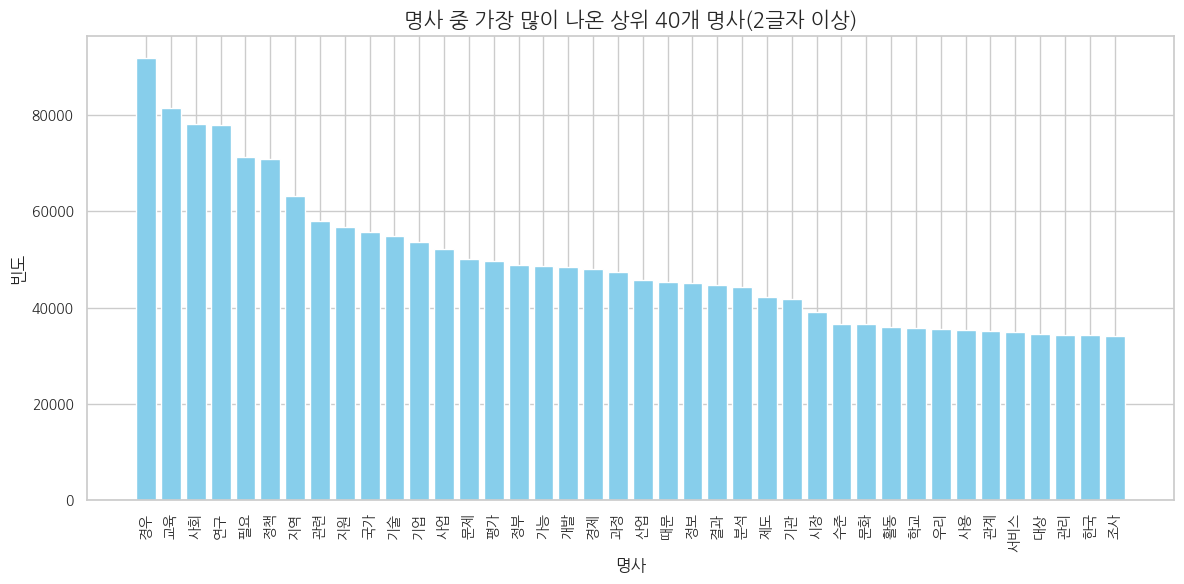

In [ ]:
# Mecab 초기화
mecab = Mecab()

# 'original_text' 열에서 명사 추출하여 리스트에 저장 (2글자 이상의 명사만 추출)
nouns_list_original = []
for text in df['original_text']:
    nouns = mecab.nouns(text)
    nouns_list_original.extend([noun for noun in nouns if len(noun) >= 2])  # 2글자 이상의 명사만 추가

# 명사 빈도를 계산
noun_counts = Counter(nouns_list_original)

# 가장 많이 나온 상위 40개 명사 추출
top_nouns_original = noun_counts.most_common(40)

# 히스토그램 그리기
plt.figure(figsize=(12, 6))
plt.bar([noun[0] for noun in top_nouns_original], [noun[1] for noun in top_nouns_original], color='skyblue')
plt.xlabel('명사', fontsize=12)
plt.ylabel('빈도', fontsize=12)
plt.title('명사 중 가장 많이 나온 상위 40개 명사(2글자 이상)', fontsize=15)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
# pip install wordcloud

(혁준님께 보내는 다잉메시지)
- 워크 클라우드 만들 때 상위 40개로만 만들었어요
- 혹시 컴퓨터 사양이 된다면 숫자 늘려도 좋습니다! 

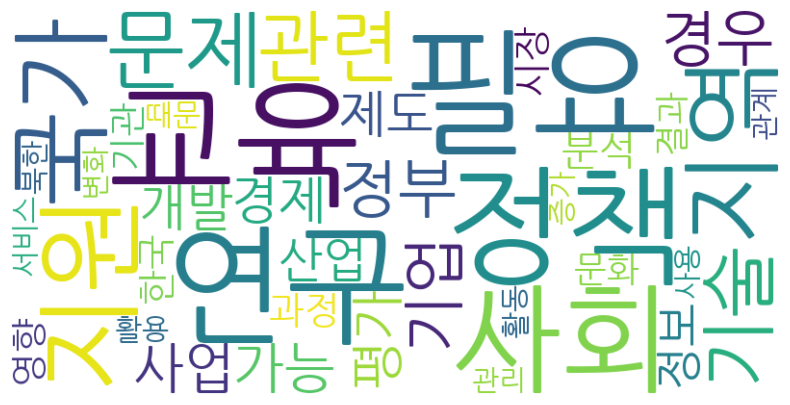

In [ ]:
from wordcloud import WordCloud

# 가장 많이 나온 상위 40개 명사 추출
top_nouns_original = noun_counts.most_common(40)

# 워드 클라우드 생성
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path)
wordcloud.generate_from_frequencies(dict(top_nouns_original))

# 워드 클라우드 출력
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
df

,original_text,summary_text,Original Word Count,Summary Word Count
0,지금의 국가가 직면하는 위기는 전통사회의 그것과 위기의 규모뿐만아니라 종류와 성질 ...,현대 사회에서 발생하는 다양하고 복잡한 위기는 과거와 다르게 국가의 재난으로 이어질...,77,18
1,자연재해나 불량 수산식품 파동 등의 인위적 재난이 수산분야 피해로이어질 경우 일반분...,"수산분야의 인위적 재난 시수산물 수급 문제로 생산자들의 매출이 크게 줄고, 시장 전...",82,24
2,하지만 이와 반대로 MG 파동 이후 기간(2005.10～2011.12)의 경우에는 ...,MG 파동 이후에는 양식 송어의 생산량의 증가가 통계적 유의성을 갖는 것으로 드러났...,97,25
3,그러나 사회적 이슈가 발생하였을 경우에 전문적으로 이러한 정보를 수집하고 분석하는 ...,사회적 이슈 발생 시 전문적으로 정보 수집 및 분석을 하는 관측 시스템이 아직 구축...,74,24
4,네 번째는 공급감소로 국내 물량이 부족하게 되면 유통질서가 왜곡될 가능성이 많기 때...,일부 경우에서의 유통질서 혼란을 방지하기 위해 거래형태의 변형이 필요하다. 의도적 ...,67,19
...,...,...,...,...
179996,북한의 하계올림픽대회 종합메달 획득 현황에 따른 종목별 기여도 순위를 종합한 결과 ...,북한의 하계올림픽대회 종합메달 획득 현황에 따른 종목별 기여도 순위는 전통적 강세 ...,65,21
179997,"둘째, 남북 고성군민 통일체육대회 개최도 고려해볼만 하다. 강원도 고성군은 한반도에...",강원도 고성군은 남북으로 나뉜 기초자치단체로 남북분단의 상징성을 잘 보여준다. 남북...,93,22
179998,"국제대회의 개최는 경제적 효과뿐 아니라 사회, 문화 등의 측면에서도 다양한 긍정적인...","국제대회를 개최하면 국민 자긍심을 높일 수 있고, 사회 구성원을 결집시킬 수 있다....",79,22
179999,"2018년 콘텐츠산업 종사자 수는 총 66만 7,437명으로 전년대비 3.5% 증가...","2018년 콘텐츠산업 종사자 수는 총 66만 7,437명으로 전년도 대비 3. 5%...",59,26


## summary_text (명사)

In [ ]:
# Mecab 초기화
mecab = Mecab()

# 'summary_text' 열에서 명사 추출하여 리스트에 저장 (2글자 이상의 명사만)
nouns_list_summary = []
for text in df['summary_text']:
    nouns = mecab.nouns(text)
    nouns_list_summary.extend([noun for noun in nouns if len(noun) >= 2])  # 2글자 이상의 명사만 추가

# 대표적인 몇 개의 명사만 출력 (예: 처음 10개만 출력)
for i, noun in enumerate(nouns_list_summary[:10]):  
    print(f"대표적인 명사 {i + 1}: {noun}")

대표적인 명사 1: 현대
대표적인 명사 2: 사회
대표적인 명사 3: 발생
대표적인 명사 4: 다양
대표적인 명사 5: 위기
대표적인 명사 6: 과거
대표적인 명사 7: 국가
대표적인 명사 8: 재난
대표적인 명사 9: 국가
대표적인 명사 10: 대책


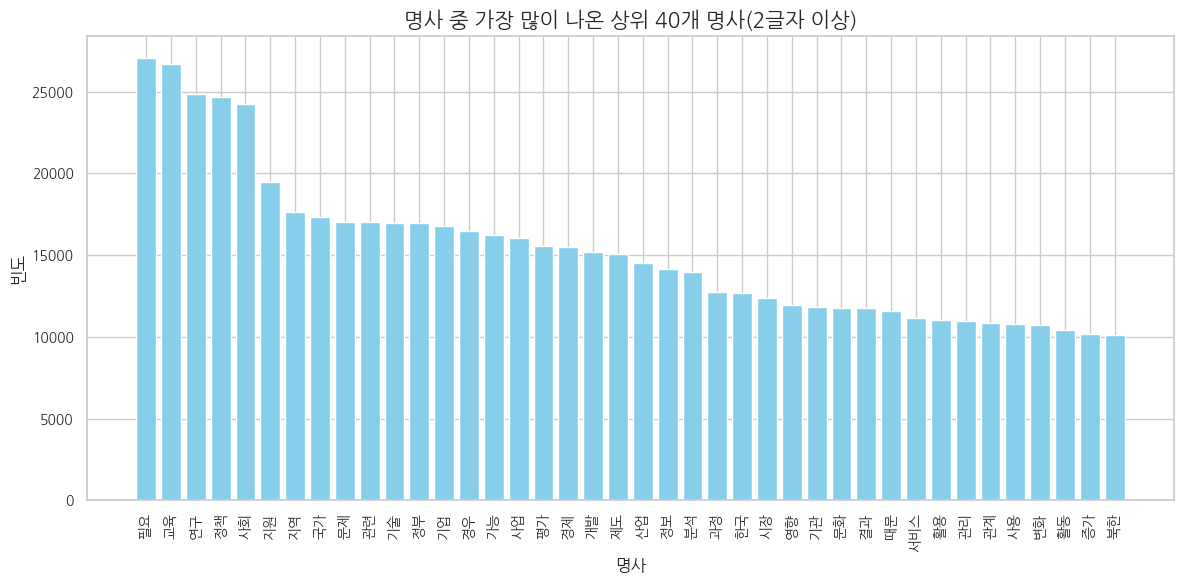

In [ ]:
# Mecab 초기화
mecab = Mecab()

# 'summary_text' 열에서 명사 추출하여 리스트에 저장 (2글자 이상의 명사만 추출)
nouns_list_summary = []
for text in df['summary_text']:
    nouns = mecab.nouns(text)
    nouns_list_summary.extend([noun for noun in nouns if len(noun) >= 2])  # 2글자 이상의 명사만 추가

# 명사 빈도를 계산
noun_counts = Counter(nouns_list_summary)

# 가장 많이 나온 상위 40개 명사 추출
top_nouns_summary = noun_counts.most_common(40)

# 히스토그램 그리기
plt.figure(figsize=(12, 6))
plt.bar([noun[0] for noun in top_nouns_summary], [noun[1] for noun in top_nouns_summary], color='skyblue')
plt.xlabel('명사', fontsize=12)
plt.ylabel('빈도', fontsize=12)
plt.title('명사 중 가장 많이 나온 상위 40개 명사(2글자 이상)', fontsize=15)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

(혁준님께 보내는 다잉메시지)
- 워크 클라우드 만들 때 상위 40개로만 만들었어요
- 혹시 컴퓨터 사양이 된다면 숫자 늘려도 좋습니다! 

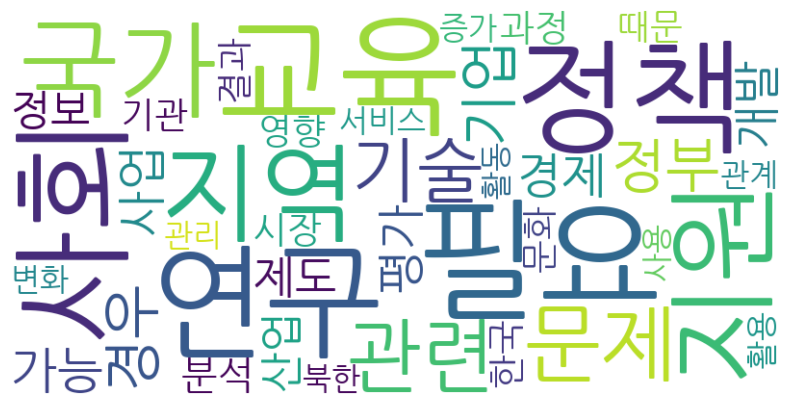

In [ ]:
# 가장 많이 나온 상위 40개 명사 추출
top_nouns_summary = noun_counts.most_common(40)

# 워드 클라우드 생성
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path)
wordcloud.generate_from_frequencies(dict(top_nouns_summary))

# 워드 클라우드 출력
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## 원문과 요약문 형태소 분석 (명사, 동사, 형용사)

In [ ]:
# 명사, 동사, 형용사 추출을 위한 함수 정의
def extract_pos_counts(text):
    nouns = mecab.nouns(text)
    verbs = [pos[0] for pos in mecab.pos(text) if pos[1].startswith('V')]
    adjectives = [pos[0] for pos in mecab.pos(text) if pos[1].startswith('VA') or pos[1].startswith('VV')]
    
    return len(nouns), len(verbs), len(adjectives)

# 각 문장에 대해 명사, 동사, 형용사 수 추출 (원문)
df['Original Noun Count'], df['Original Verb Count'], df['Original Adjective Count'] = zip(*df['original_text'].apply(extract_pos_counts))

# 각 문장에 대해 명사, 동사, 형용사 수 추출 (요약문)
df['Summary Noun Count'], df['Summary Verb Count'], df['Summary Adjective Count'] = zip(*df['summary_text'].apply(extract_pos_counts))

# 결과 출력
print(df[['Original Noun Count', 'Original Verb Count', 'Original Adjective Count', 
          'Summary Noun Count', 'Summary Verb Count', 'Summary Adjective Count']].head())

KeyboardInterrupt: 

In [ ]:
# DataFrame 열 이름 확인
print(df.columns)

Index(['original_text', 'summary_text', 'Original Word Count',
       'Summary Word Count', 'original_text_length', 'summary_text_length',
       'Original Word Length', 'Summary Word Length',
       'Original Sentence Count', 'Summary Sentence Count'],
      dtype='object')


In [ ]:
df

,original_text,summary_text,Original Word Count,Summary Word Count,original_text_length,summary_text_length,Original Word Length,Summary Word Length,Original Sentence Count,Summary Sentence Count
0,지금의 국가가 직면하는 위기는 전통사회의 그것과 위기의 규모뿐만아니라 종류와 성질 ...,현대 사회에서 발생하는 다양하고 복잡한 위기는 과거와 다르게 국가의 재난으로 이어질...,77,18,320,74,320,74,5,2
1,자연재해나 불량 수산식품 파동 등의 인위적 재난이 수산분야 피해로이어질 경우 일반분...,"수산분야의 인위적 재난 시수산물 수급 문제로 생산자들의 매출이 크게 줄고, 시장 전...",82,24,346,102,346,102,5,2
2,하지만 이와 반대로 MG 파동 이후 기간(2005.10～2011.12)의 경우에는 ...,MG 파동 이후에는 양식 송어의 생산량의 증가가 통계적 유의성을 갖는 것으로 드러났...,97,25,402,93,402,93,8,3
3,그러나 사회적 이슈가 발생하였을 경우에 전문적으로 이러한 정보를 수집하고 분석하는 ...,사회적 이슈 발생 시 전문적으로 정보 수집 및 분석을 하는 관측 시스템이 아직 구축...,74,24,311,87,311,87,6,2
4,네 번째는 공급감소로 국내 물량이 부족하게 되면 유통질서가 왜곡될 가능성이 많기 때...,일부 경우에서의 유통질서 혼란을 방지하기 위해 거래형태의 변형이 필요하다. 의도적 ...,67,19,300,87,300,87,5,3
...,...,...,...,...,...,...,...,...,...,...
179996,북한의 하계올림픽대회 종합메달 획득 현황에 따른 종목별 기여도 순위를 종합한 결과 ...,북한의 하계올림픽대회 종합메달 획득 현황에 따른 종목별 기여도 순위는 전통적 강세 ...,65,21,306,86,306,86,4,2
179997,"둘째, 남북 고성군민 통일체육대회 개최도 고려해볼만 하다. 강원도 고성군은 한반도에...",강원도 고성군은 남북으로 나뉜 기초자치단체로 남북분단의 상징성을 잘 보여준다. 남북...,93,22,406,98,406,98,6,3
179998,"국제대회의 개최는 경제적 효과뿐 아니라 사회, 문화 등의 측면에서도 다양한 긍정적인...","국제대회를 개최하면 국민 자긍심을 높일 수 있고, 사회 구성원을 결집시킬 수 있다....",79,22,353,94,353,94,3,3
179999,"2018년 콘텐츠산업 종사자 수는 총 66만 7,437명으로 전년대비 3.5% 증가...","2018년 콘텐츠산업 종사자 수는 총 66만 7,437명으로 전년도 대비 3. 5%...",59,26,368,110,368,110,17,4
